# College Admission

Dataset นี้เป็นข้อมูลการรับเข้าเรียนต่อในระดับมหาวิทยาลัยในระดับ Postgraduate Education โดยมีข้อมูลปัจจัยต่างๆ ได้แก่คะแนนสอบของผู้สมัคร, คะแนน Statement of Purpose, GPA  ระดับปริญญาตรี, ประสบการณ์การวิจัย

## Data Description
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )

### Target Variable
**Chance of Admit ( ranging from 0 to 1 )**

## Objective:
- สร้าง regression model เพื่อทำนายโอกาสการรับเข้าเรียน (Chance of Admit) โดยใช้ Linear Regression (อย่าลืมตรวจสอบสมมติฐานเบื้องต้นของข้อมูล)
- สร้าง regression model เพื่อทำนายโอกาสการรับเข้าเรียน (Chance of Admit) โดยใช้ Random Forest Regression
- ปัจจัยใดเป็นปัจจัยที่มีความสำคัญต่อการรับเข้าเรียน 3 ลำดับแรก

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python4ML/Homework/admission_prepared.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,9.65,1,0.92
1,2,324,107,4,4.0,8.87,1,0.76
2,3,316,104,3,3.0,8.00,1,0.72
3,4,322,110,3,3.5,8.67,1,0.80
4,5,314,103,2,2.0,8.21,0,0.65


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


ตรวจสอบข้อมูลทั้งหมดว่ามี null value ในแต่ละ column จำนวนเท่าไร

In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

ลบช่องว่างหลัง Admit ใน column name 'Chance of Admit'



In [ ]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)

Check columns name

In [ ]:
df.columns

##Exploratory Data Analysis

วิเคราะห์ข้อมูลเบื่องต้น

###วาด jointplot เพื่อดูการกระจายของข้อมูลพร้อมกราฟฮิสโทแกรม

วาด jointplot โดยให้แกน x เป็น GRE Scoreและแกน y เป็น Chance of Admit

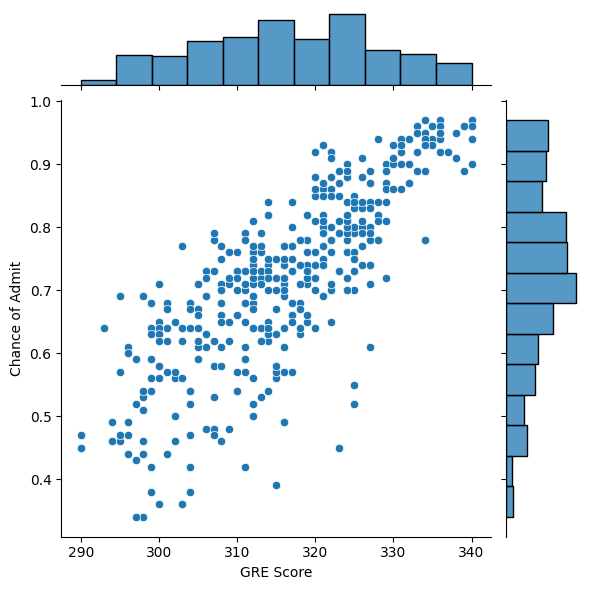

In [ ]:
sns.jointplot(data=df, x='GRE Score', y='Chance of Admit')

วาด jointplot โดยให้แกน x เป็น TOEFL Score และแกน y เป็น Chance of Admit

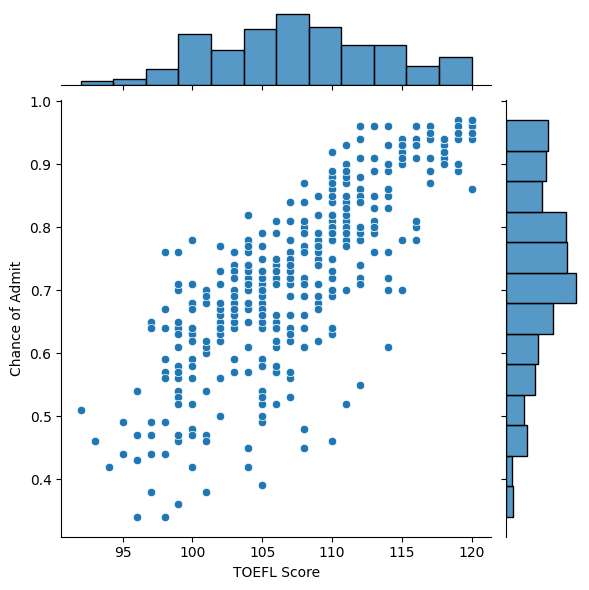

In [ ]:
sns.jointplot(data=df, x='TOEFL Score', y='Chance of Admit')

วาด jointplot โดยให้แกน x เป็น University Rating และแกน y เป็น Chance of Admit

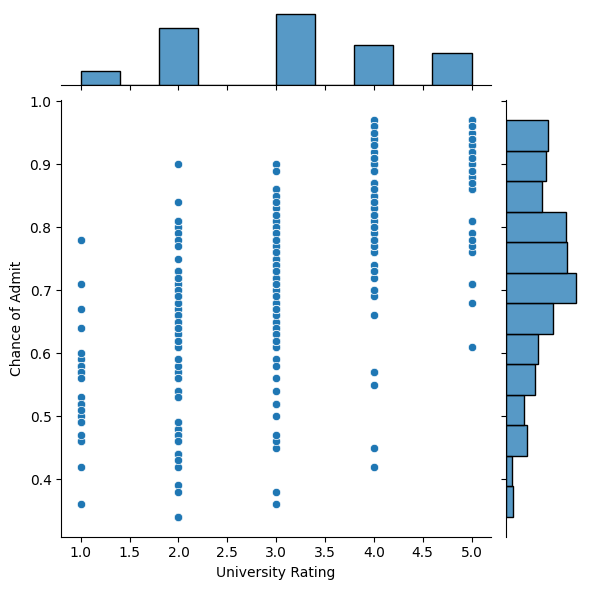

In [ ]:
sns.jointplot(data=df, x='University Rating', y='Chance of Admit')

วาด jointplot โดยให้แกน x เป็น SOP และแกน y เป็น Chance of Admit

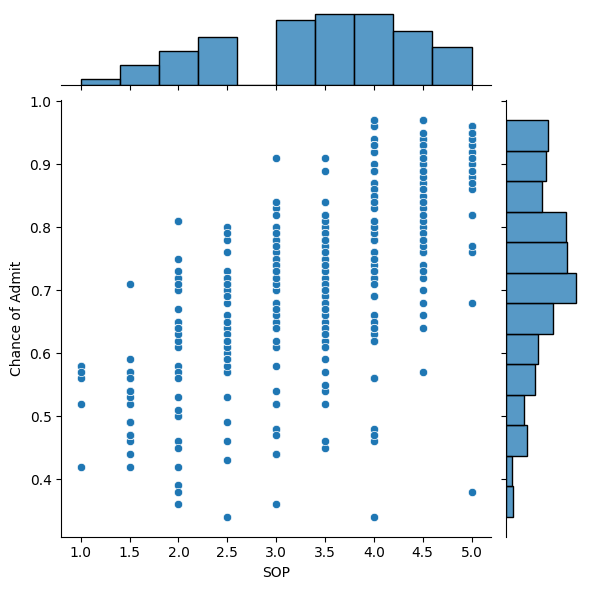

In [ ]:
sns.jointplot(data=df, x='SOP', y='Chance of Admit')

วาด jointplot โดยให้แกน x เป็น CGPA และแกน y เป็น Chance of Admit

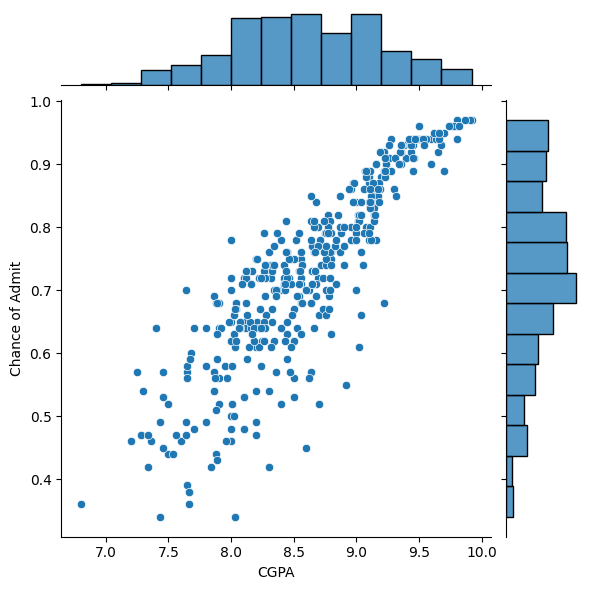

In [ ]:
sns.jointplot(data=df, x='CGPA', y='Chance of Admit')

วาด jointplot โดยให้แกน x เป็น Research และแกน y เป็น Chance of Admit

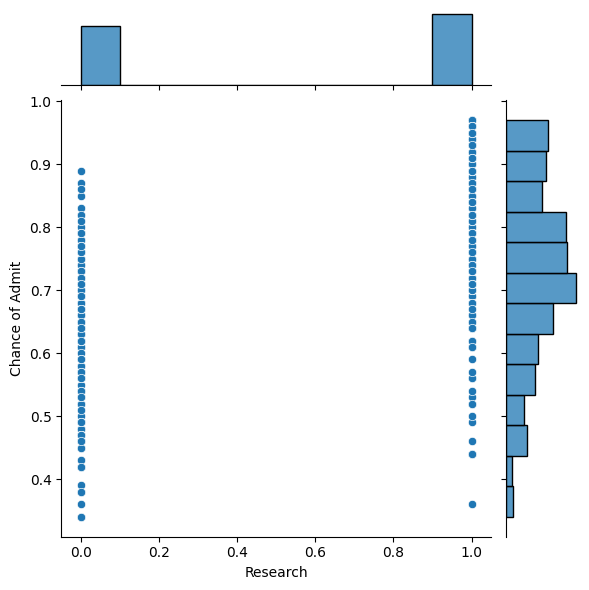

In [ ]:
sns.jointplot(data=df, x='Research', y='Chance of Admit')

###วาด Boxplot เพื่อดู outlier

วาด Boxplot เพื่อดูค่า outlier ของ column GRE Score

<Axes: xlabel='GRE Score'>

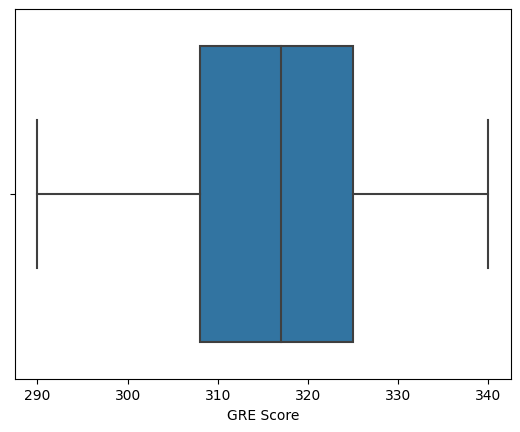

In [ ]:
sns.boxplot(x=df['GRE Score'])

วาด Boxplot เพื่อดูค่า outlier ของ column TOEFL Score

<Axes: xlabel='TOEFL Score'>

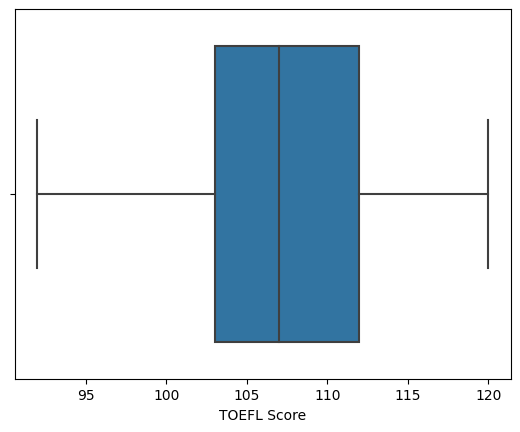

In [ ]:
sns.boxplot(x=df['TOEFL Score'])

วาด Boxplot เพื่อดูค่า outlier ของ column University Rating

<Axes: xlabel='University Rating'>

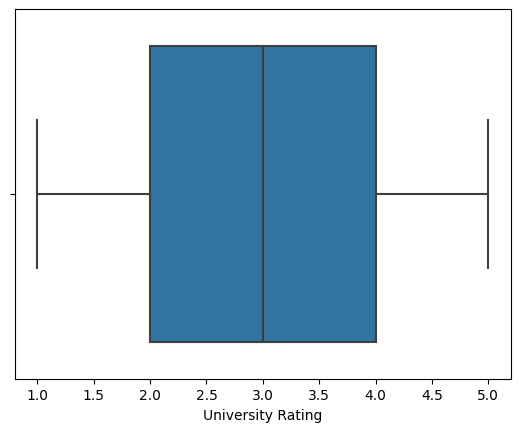

In [ ]:
sns.boxplot(x=df['University Rating'])

วาด Boxplot เพื่อดูค่า outlier ของ SOP

<Axes: xlabel='SOP'>

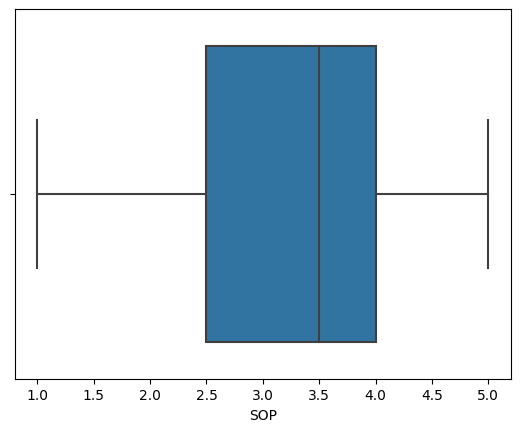

In [ ]:
sns.boxplot(x=df['SOP'])

วาด Boxplot เพื่อดูค่า outlier ของ CGPA

<Axes: xlabel='CGPA'>

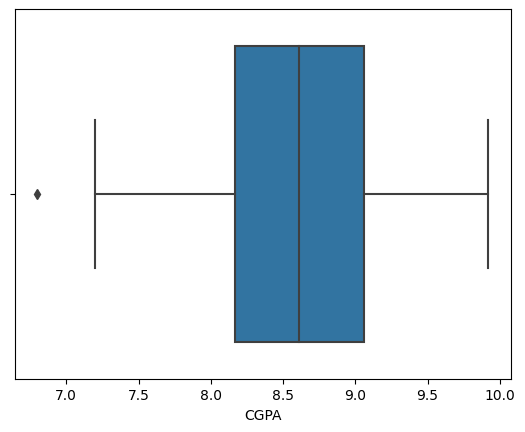

In [ ]:
sns.boxplot(x=df['CGPA'])

วาด Boxplot เพื่อดูค่า outlier ของ Research

<Axes: xlabel='Research'>

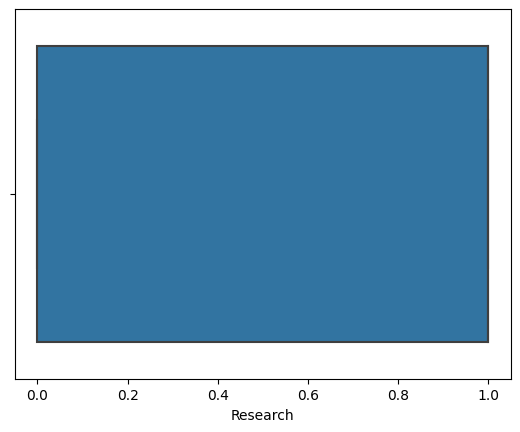

In [ ]:
sns.boxplot(x=df['Research'])

วาด Boxplot เพื่อดูค่า outlier ของ Chance of Admit

<Axes: xlabel='Chance of Admit'>

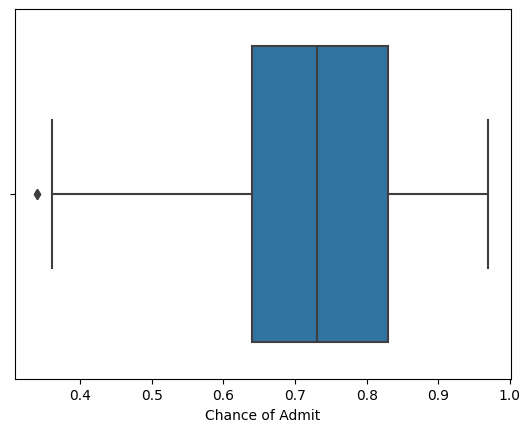

In [ ]:
sns.boxplot(x=df['Chance of Admit'])

เนื่องจากทุก column ไม่มี outlier จึงไม่ต้องทำ remove outlier

วาด pairplot เพื่อดูความสัมพันธ์ของแต่ละ feature

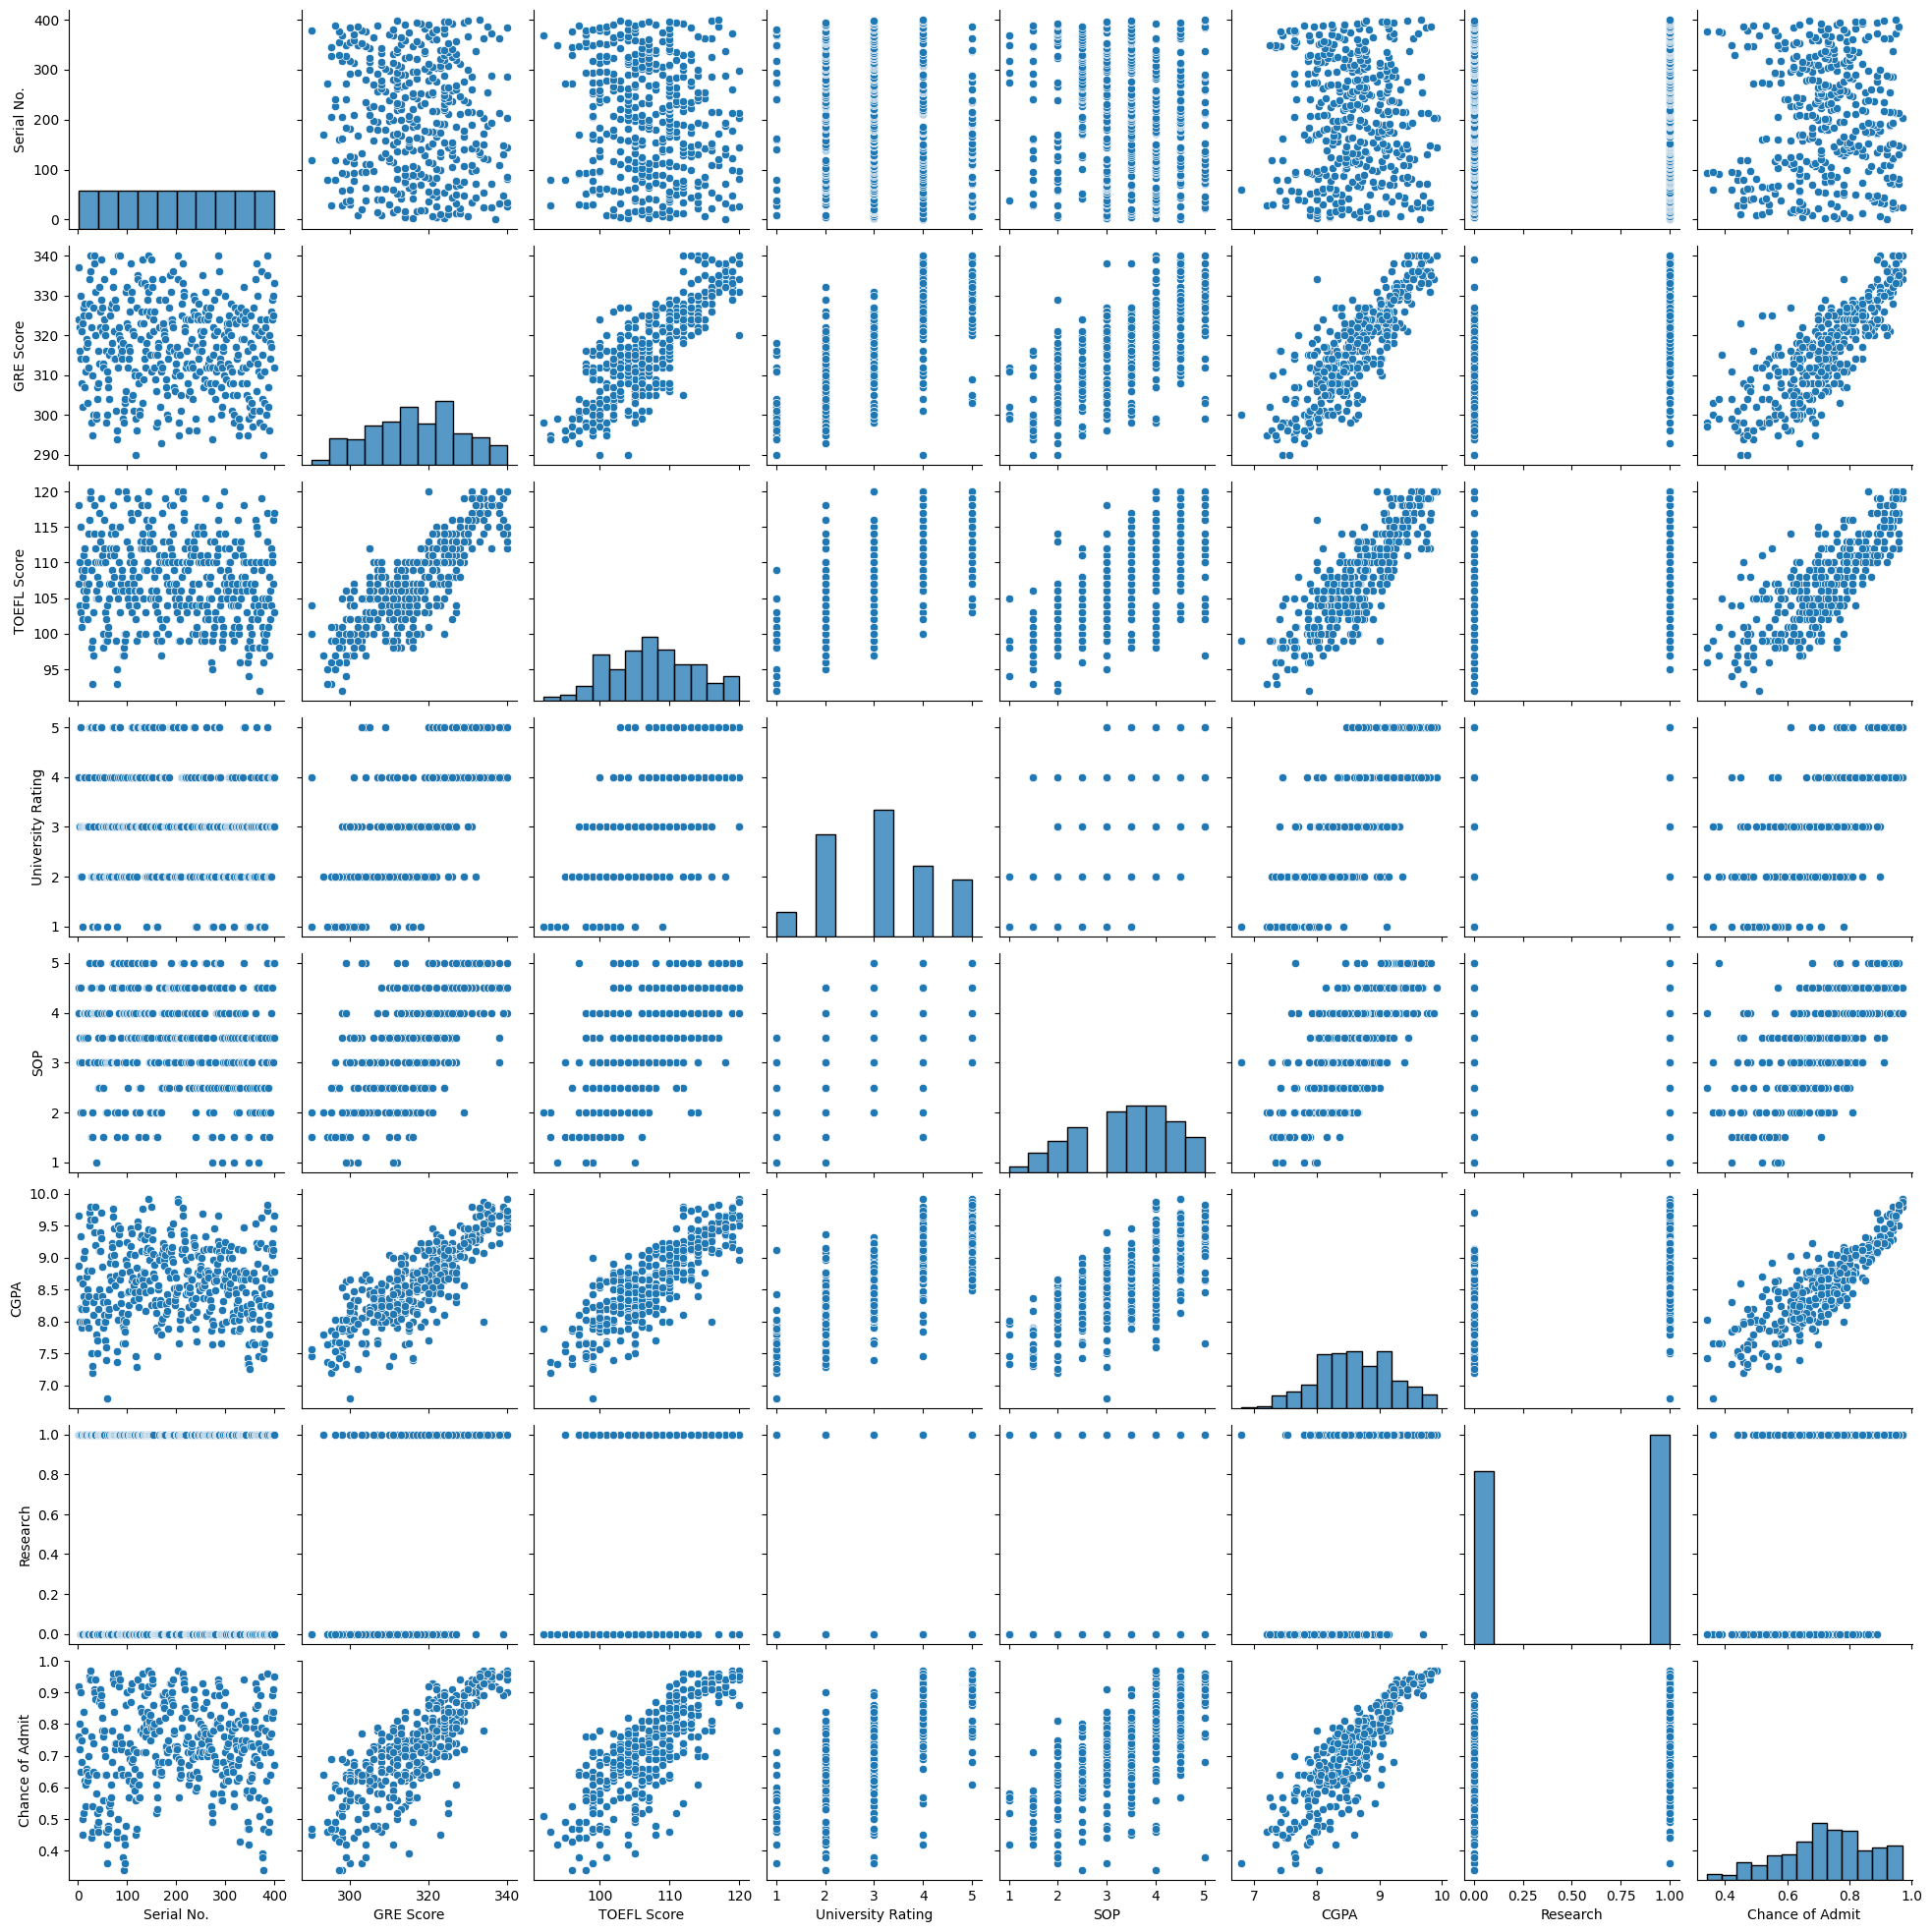

In [ ]:
sns.pairplot(df)

###หา correlation ของ feature

In [ ]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.718144,0.444029,0.675732
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.873289,0.553202,1.000000


Plot heat map เพื่อดูค่า correlation ของแต่ละ feature กับ Change of Admit

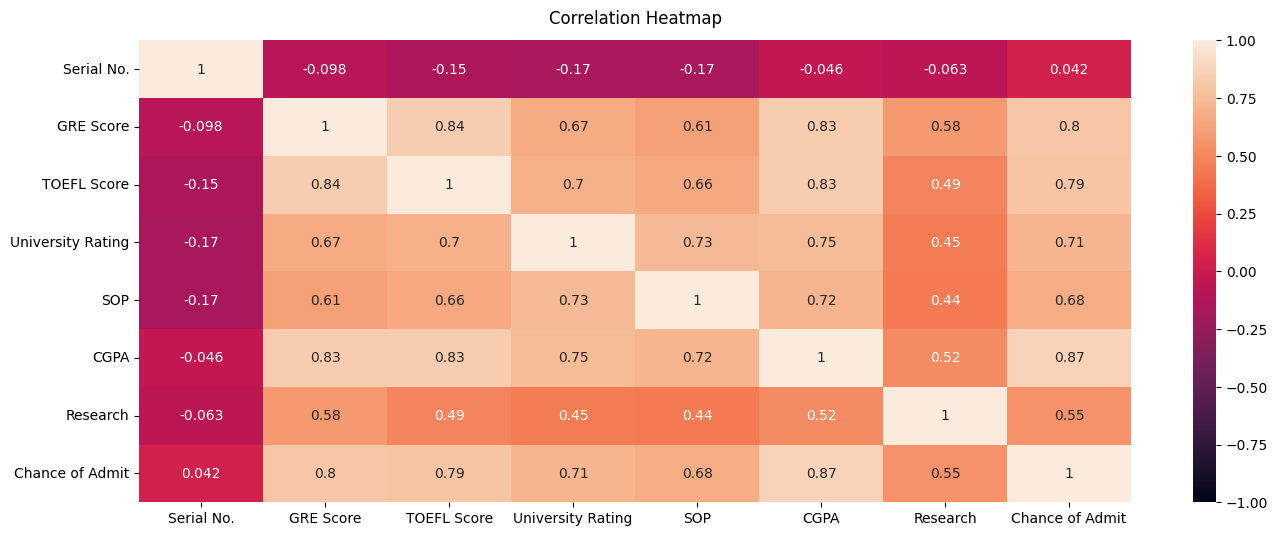

In [ ]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Drop columns Serial No. ทิ้งเพราะมีค่า correlation กับ Change of Admit น้อยมากๆ

In [ ]:
df.drop('Serial No.',axis=1, inplace=True)

กำหนดตัวแปร x และ y เพื่อจะนำไปทำ train test split

In [ ]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA','Research']]
y = df['Chance of Admit']

ทำ train test split โดยแบ่งข้อมูล test เป็น 0.2

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

ดูขนาดข้องข้อมูล train และข้อมูล test

In [ ]:
X_train.shape

(320, 6)

In [ ]:
X_test.shape

(80, 6)

สร้าง model LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

ดูค่า coefficient

In [ ]:
lm.coef_

array([0.0019415 , 0.00276943, 0.01178723, 0.00602242, 0.12199203,
       0.01817956])

ดูค่า intercept

In [ ]:
lm.intercept_

-1.303412160757053

Prediction ข้อมูล test

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([0.52239031, 0.60717484, 0.64106315, 0.65087936, 0.68815234,
       0.70768436, 0.78798604, 0.47519066, 0.85072714, 0.80669537,
       0.78514088, 0.70232757, 0.876747  , 0.99162153, 0.56781046,
       0.74383903, 0.7031966 , 0.66377219, 0.5150732 , 0.6607182 ,
       0.55528964, 0.66580526, 0.76280249, 0.62268166, 0.46537027,
       0.8183423 , 0.76128739, 0.69792347, 0.51537499, 0.82435263,
       0.72475382, 0.69663849, 0.56517259, 0.88727024, 0.51472789,
       0.57309149, 0.66153961, 0.57877368, 0.71018367, 0.71774504,
       0.61967588, 0.84956818, 0.8933767 , 0.77305092, 0.72016776,
       0.94339609, 0.62780714, 0.73706171, 0.55420664, 0.7133653 ,
       0.61463631, 0.90761166, 0.79977492, 0.53442861, 0.74632691,
       0.77394951, 0.74630421, 0.59380514, 0.62864563, 0.53659611,
       0.52405401, 0.69079811, 0.54273289, 0.54566534, 0.71931301,
       0.58685461, 0.67438965, 0.64798517, 0.5168994 , 0.67610139,
       0.48021137, 0.7941495 , 0.77869751, 0.75160504, 0.66598

วาด scatterplot เพื่อดูความสัมพันะ์ของข้อมูล y_test และ y_pred

Text(0, 0.5, 'Y Predicted')

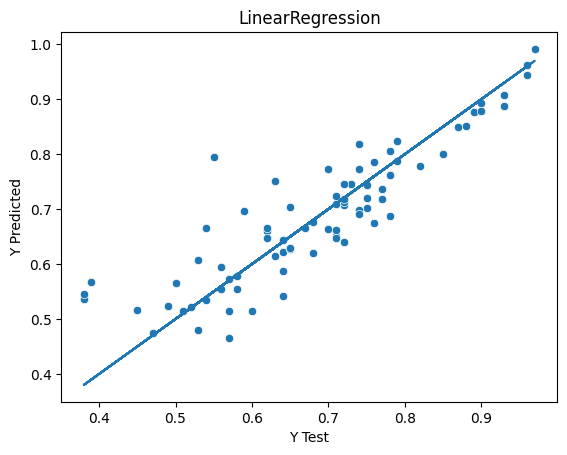

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test,y_test)
plt.title("LinearRegression")
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

ดูค่า Mean Absolute Error, Mean Square Error และ Root Mean Square Error

In [ ]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 0.04481237600464589
Mean Square Error: 0.00402594291463598
Root Mean Square Error : 0.06345031847544959


ดูค่า R2 score

In [ ]:
metrics.r2_score(y_test, y_pred)

0.7820779560919704

สร้าง model RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

ทำ GridsearchCV เพื่อหา best parameters

In [ ]:
param_grid = {
            "n_estimators"      : [10,20,30,40,50,60,70,80,90,100],
            "max_features"      : ["None", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth': [1, 2, 3, 4, None],
            'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
            }

In [ ]:
CV_rfr = GridSearchCV(estimator=rf, param_grid=param_grid, refit=True, verbose=3)
CV_rfr.fit(X_train, y_train)

In [ ]:
CV_rfr.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 30}

สร้าง model ด้วย best parameters

In [ ]:
rfr1=RandomForestRegressor(random_state=42, max_features='log2', n_estimators= 30, max_depth=None,
                           min_samples_split=4, bootstrap=True, criterion= 'squared_error')

ดูค่า accuracy

In [ ]:
rfr1.fit(X_train, y_train)
rfr1.score(X_train, y_train)

0.9321493472096791

Predict ข้อมูล X test

In [ ]:
y_pred_rfr = rfr1.predict(X_test)

ดูค่า mean squared error

In [ ]:
mean_squared_error(y_test, y_pred_rfr)

0.00454547610178099

วาด scatterplot เพื่อดูความสัมพัธ์ของข้อมูล y_test และ y_pred

Text(0, 0.5, 'Y Predicted')

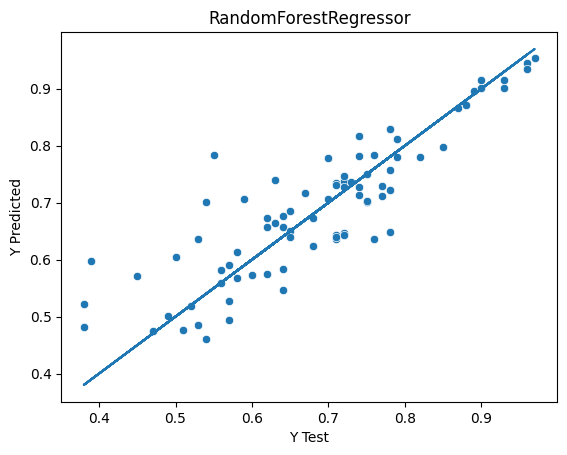

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_rfr)
plt.plot(y_test,y_test)
plt.title("RandomForestRegressor")
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

ปัจจัยที่มีความสำคัญต่อการรับเข้าเรียน 3 ลำดับแรกคือ
1. GRE score
2. TOFEL score
3. CGPA

เพราะมีค่า correlation กับ Change of Admit มากที่สุด และจาก jointplot จะเห็นค่าการกระจายตัวของข้อมูลดูเป็น linear กับ Change of Admit มากที่สุด